Выполнил Пуголовок Александр, магистратура, 1 курс

In [ ]:
!pip install python-graphblas[default]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.9/350.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 11.9 MB/s eta 0:00:00


In [ ]:
import graphblas as gb
gb.init("suitesparse", blocking=False)

from graphblas import Matrix, dtypes, unary, binary, monoid, semiring, Recorder
from graphblas.io import mmread
import numpy as np
import random
import math

##Поставленные задачи (обязательные):

1. Используя python-graphblas реализовать наивный алгоритм, для матрицы смежности
 вычисляющий
 и возвращающий количество треугольников неориентированного графа. <br>
 Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно). <br>
 Функция возвращает число --- количество треугольников в графе.

2. Используя python-graphblas реализовать наивный алгоритм с маской, для матрицы смежности
 вычисляющий
 и возвращающий количество треугольников неориентированного графа. <br>
 Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
 <br> Функция возвращает число --- количество треугольников в графе.

3. Используя python-graphblas реализовать Сohen's algorithm, вычисляющий количество треугольников неориентированного графа. <br>
 Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
 <br> Функция возвращает число --- количество треугольников в графе.

4. Используя python-graphblas реализовать Sandia algorithm, вычисляющий количество треугольников неориентированного графа. <br>
 Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
 <br> Функция возвращает число --- количество треугольников в графе.

##Реализация наивного алгоритма:

In [ ]:
# Порядок работы функции:
# Матрица смежности возводится в куб путём возведения в квадрат и ещё одного умножения.
# В вектор собираются элементы главной диагонали.
# Подсчитывается сумма элементов данного вектора (диагонали кубической матрицы).
# Результат делится на 6 (и приводится к целому).

def naiveA3(matrix):
  A2 = matrix.mxm(matrix)
  A3 = A2.mxm(matrix)
  vector = A3.diag()
  summa = vector.reduce(gb.agg.sum).value or 0
  result = int(summa / 6)
  return result

##Реализация наивного алгоритма с маской:

In [ ]:
# Порядок работы функции:
# Матрица смежности возводится в квадрат
# К полученному квадрату применяется маска
# Вычисляется сумма построчных сумм результата предыдущего шага.
# Результат делится на 6 (и приводится к целому).

def naiveMaskA2(matrix):
  A2 = matrix.mxm(matrix)
  masking = A2.dup(mask=matrix.dup(dtype=dtypes.BOOL))
  summa = masking.reduce_scalar(gb.monoid.plus).value or 0
  result = int(summa / 6)
  return result

##Реализация алгоритма Кохена:

In [ ]:
# Порядок работы функции:
# Выполняется LU-разложение для исходной матрицы
# Находится произведение матриц L и U
# Выполняется поэлементное умножение исходной матрицы и матрицы, полученной на предыдущем шаге
# Результат находится как половина сумм построчных сумм

def cohen(matrix):
  L = gb.select.tril(matrix)
  U = gb.select.triu(matrix)
  B = L.mxm(U)
  C = B.dup(mask=matrix.dup(dtype=dtypes.BOOL))
  final = int (C.reduce_scalar(gb.monoid.plus).value or 0) / 2
  return int(final)

##Реализация алгоритма Сандии:

In [ ]:
# Порядок работы функции:
# Находится нижнеугольная матрица для исходной
# Находится квадрат найденной матрицы
# Выполняется поэлементное умножение найденной матрицы на себя же с применением маски
# Результат находится сумма построчных сумм с приведением к целому

def sandia(matrix):
  L = gb.select.tril(matrix)
  B = L.mxm(L)
  C = B.dup(mask=L.dup(dtype=dtypes.BOOL))
  result = int(C.reduce_scalar(gb.monoid.plus).value or 0)
  return int(result)

## **Тестирование построенных функций**

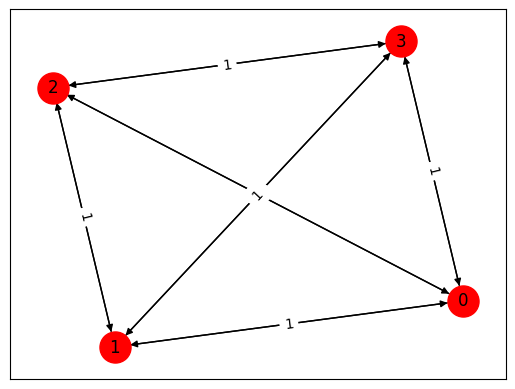

Наивный: 4
Наивный с маской: 4
Кохен: 4
Сандия: 4


In [ ]:
# Построим полносвязный планарный граф с четырьмя вершинами
# Он должен быть как треугольник с одной вершиной внутри трегульника (чтобы быть планарным)
# К сожалению программа отрисовывает его в непланарном виде

M1 = gb.Matrix.from_coo(
  [0, 1, 1, 2, 2, 0, 2, 3, 3, 1, 3, 0],
  [1, 0, 2, 1, 0, 2, 3, 2, 1, 3, 0, 3],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  nrows=4, ncols=4,)

gb.viz.draw(M1)

print('Наивный:', naiveA3(M1))
print('Наивный с маской:', naiveMaskA2(M1))
print('Кохен:', cohen(M1))
print('Сандия:', sandia(M1))

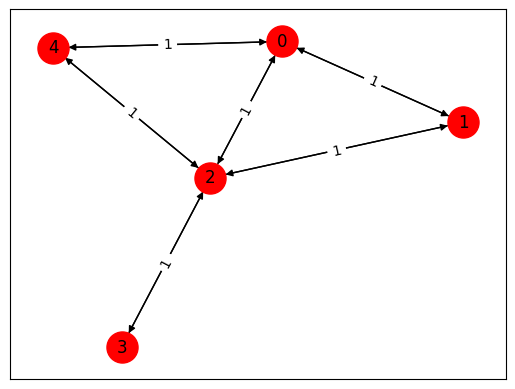

Наивный: 2
Наивный с маской: 2
Кохен: 2
Сандия: 2


In [ ]:
# Граф - воздушный змей

M2 = gb.Matrix.from_coo(
  [0, 1, 1, 2, 2, 0, 2, 3, 4, 0, 4, 2],
  [1, 0, 2, 1, 0, 2, 3, 2, 0, 4, 2, 4],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  nrows=5, ncols=5,)

gb.viz.draw(M2)

print('Наивный:', naiveA3(M2))
print('Наивный с маской:', naiveMaskA2(M2))
print('Кохен:', cohen(M2))
print('Сандия:', sandia(M2))

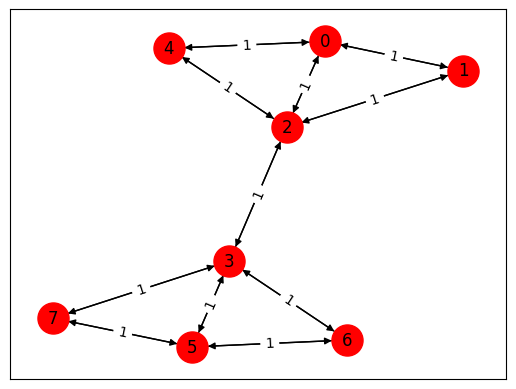

Наивный: 4
Наивный с маской: 4
Кохен: 4
Сандия: 4


In [ ]:
# Граф - два воздушных змея, связанных верёвочкой

M3 = gb.Matrix.from_coo(
  [0, 1, 1, 2, 2, 0, 2, 3, 4, 0, 4, 2, 3, 5, 3, 6, 5, 6, 3, 7, 5, 7],
  [1, 0, 2, 1, 0, 2, 3, 2, 0, 4, 2, 4, 5, 3, 6, 3, 6, 5, 7, 3, 7, 5],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  nrows=8, ncols=8,)

gb.viz.draw(M3)

print('Наивный:', naiveA3(M3))
print('Наивный с маской:', naiveMaskA2(M3))
print('Кохен:', cohen(M3))
print('Сандия:', sandia(M3))

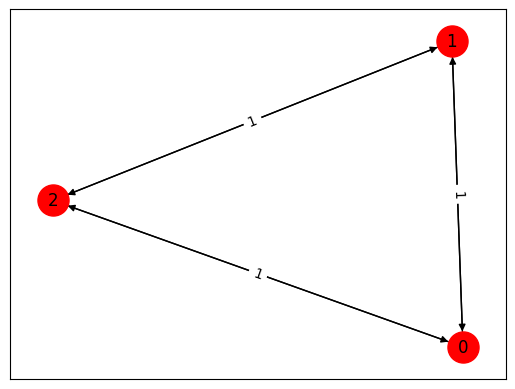

Наивный: 1
Наивный с маской: 1
Кохен: 1
Сандия: 1


In [ ]:
# Просто треугольник

M4 = gb.Matrix.from_coo(
  [0, 1, 1, 2, 2, 0],
  [1, 0, 2, 1, 0, 2],
  [1, 1, 1, 1, 1, 1],
  nrows=3, ncols=3,)

gb.viz.draw(M4)

print('Наивный:', naiveA3(M4))
print('Наивный с маской:', naiveMaskA2(M4))
print('Кохен:', cohen(M4))
print('Сандия:', sandia(M4))

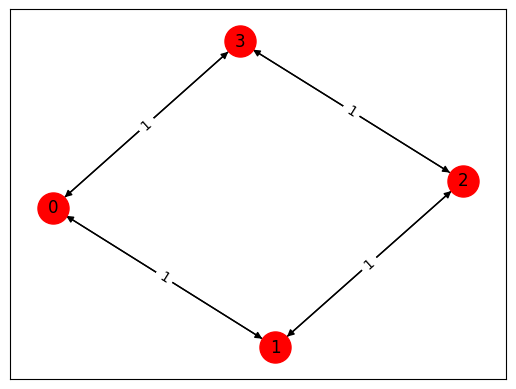

Наивный: 0
Наивный с маской: 0
Кохен: 0
Сандия: 0


In [ ]:
# Просто квадрат

M5 = gb.Matrix.from_coo(
  [0, 1, 1, 2, 3, 0, 2, 3],
  [1, 0, 2, 1, 0, 3, 3, 2],
  [1, 1, 1, 1, 1, 1, 1, 1],
  nrows=4, ncols=4,)

gb.viz.draw(M5)

print('Наивный:', naiveA3(M5))
print('Наивный с маской:', naiveMaskA2(M5))
print('Кохен:', cohen(M5))
print('Сандия:', sandia(M5))

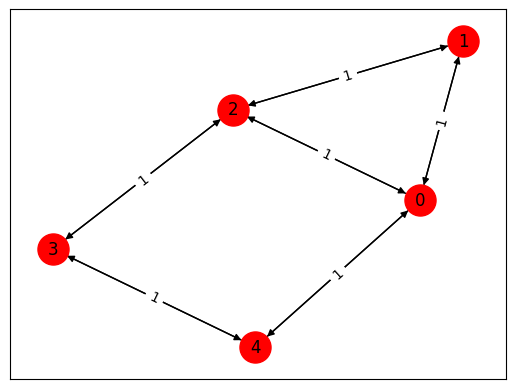

Наивный: 1
Наивный с маской: 1
Кохен: 1
Сандия: 1


In [ ]:
# Граф "домик"

M6 = gb.Matrix.from_coo(
  [0, 1, 1, 2, 3, 4, 2, 3, 4, 0, 0, 2],
  [1, 0, 2, 1, 4, 3, 3, 2, 0, 4, 2, 0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  nrows=5, ncols=5,)

gb.viz.draw(M6)

print('Наивный:', naiveA3(M6))
print('Наивный с маской:', naiveMaskA2(M6))
print('Кохен:', cohen(M6))
print('Сандия:', sandia(M6))

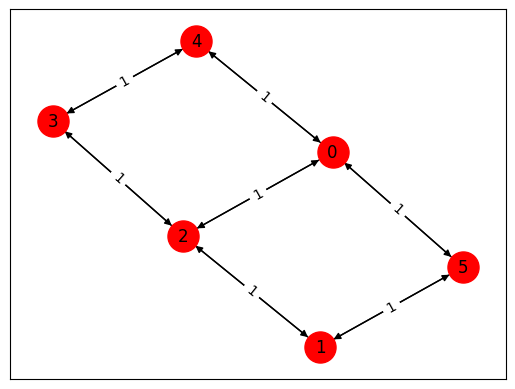

Наивный: 0
Наивный с маской: 0
Кохен: 0
Сандия: 0


In [ ]:
# Шестиугольник с диагональю

M7 = gb.Matrix.from_coo(
  [5, 1, 1, 2, 3, 4, 2, 3, 4, 0, 0, 2, 0, 5],
  [1, 5, 2, 1, 4, 3, 3, 2, 0, 4, 2, 0, 5, 0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  nrows=6, ncols=6,)

gb.viz.draw(M7)

print('Наивный:', naiveA3(M7))
print('Наивный с маской:', naiveMaskA2(M7))
print('Кохен:', cohen(M7))
print('Сандия:', sandia(M7))

**Общий вывод:** <br>
Построенные функции работают корректно.

# Дополнительные задания

## Подсчёт треугольников для вершин

In [ ]:
# Порядок работы функции:
# Находится куб матрицы смежности.
# Из данного куба берутся элементы, стоящие на главной диагонали.
# Полученные на предыдущем шаге значения делятся на 2 с целью удаления дублирования при счёте.
# Инициализируется вектор количества треугольников для каждой вершины. Изначально заполнен нулями.
# С помощью функции to_coo() с диагонали снимаются индексы и соответствующие значения.
# На последнем шаге заполняется результирующий массив

def count_of_triangles_for_point(matrix):
  A2 = matrix.mxm(matrix)
  A3 = A2.mxm(matrix)
  n = A3.diag() / 2
  rows = matrix.nrows
  cols = matrix.ncols
  result = np.array([0] * rows)
  index, values = n.to_coo()
  for i in range(len(index)):
    result[index[i]] = values[i]
  return result

In [ ]:
count_of_triangles_for_point(M1)

array([3, 3, 3, 3])

In [ ]:
count_of_triangles_for_point(M2)

array([2, 1, 2, 0, 1])

In [ ]:
count_of_triangles_for_point(M3)

array([2, 1, 2, 2, 1, 2, 1, 1])

In [ ]:
count_of_triangles_for_point(M4)

array([1, 1, 1])

In [ ]:
count_of_triangles_for_point(M5)

array([0, 0, 0, 0])

In [ ]:
count_of_triangles_for_point(M6)

array([1, 1, 1, 0, 0])

In [ ]:
count_of_triangles_for_point(M7)

array([0, 0, 0, 0, 0, 0])

**Вывод:** <br>
Функция корректно определяет количество треугольников, в которые входит вершина, для всех рассмотренных тестовых графов.

## 10 настоящих графов (с сайта)

In [ ]:
gr1 = mmread('/content/Erdos992.mtx')
gr2 = mmread('/content/G47.mtx')
gr3 = mmread('/content/ca-GrQc.mtx')
gr4 = mmread('/content/can_1054.mtx')
gr5 = mmread('/content/commanche_dual.mtx')
gr6 = mmread('/content/dwt_1242.mtx')
gr7 = mmread('/content/eris1176.mtx')
gr8 = mmread('/content/lshp1561.mtx')
gr9 = mmread('/content/rajat02.mtx')
gr10 = mmread('/content/sstmodel.mtx')

In [ ]:
graph_set = [gr1, gr2, gr3, gr4, gr5, gr6, gr7, gr8, gr9, gr10]

In [ ]:
def work_time(A):
  print('Naive')
  %timeit naiveA3(A)
  print('Naive_with_mask')
  %timeit naiveMaskA2(A)
  print('Cohen')
  %timeit cohen(A)
  print('Sandia')
  %timeit sandia(A)

In [ ]:
i = 1
for gr in graph_set:
  print('Graph №', i)
  print('Количество вершин:', gr.nrows, ', количество ребер:', gr.nvals)
  work_time(gr)
  i += 1
  print()

Graph № 1
Количество вершин: 6100 , количество ребер: 15030
Naive
The slowest run took 4.17 times longer than the fastest. This could mean that an intermediate result is being cached.
130 ms ± 63.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive_with_mask
2.11 ms ± 826 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Cohen
2.69 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Sandia
1.07 ms ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Graph № 2
Количество вершин: 1000 , количество ребер: 19980
Naive
90.2 ms ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive_with_mask
2.54 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Cohen
1.86 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Sandia
1.16 ms ± 228 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Graph № 3
Количество вершин: 5242 , количество ребер: 28980
Naive
43.9 ms ± 3.44 ms per loop (mean ± std. dev. of 7 

Выводы: <br>
1. Наивный алгоритм очень сильно отстаёт от других алгоритмов на всех графах. <br>
2. Наивный алгоритм с маской в среднем в полтора-два раза уступает алгоритму Кохена. <br>
3. Алгоритм Сандии работает быстрее всех. <br>
4. При увеличении числа вершин и числа рёбер графа увеличивается время работы всех алголритмов. <br>
5. Однако среди рассмотренных графов имеются примеры, когда при большем числе вершин и рёбер граф обрабатывается быстрее. Например, пара графов 3 и 5, где граф № 3 - это ca-GrQc, имеющий 5242 вершин и 28980 рёбер, а граф № 5 - это commanche_dual, имеющий 7920 вершин и 31680 ребёр. При этом алгоритм Сандии обрабатывает граф № 3 за 2.68 мс, а граф № 5 за 1.98 мс.

##Случайные графы

In [ ]:
# Функция принимает два параметра: количество вершин и разреженность.
# Количество рёбер в случайно генерируемом графе определяется выполнением неравенства,
# состоящего в том, что отношение количества рёбер к максимально возможному количеству
# рёбер при данном количестве вершин не должно превысить значение параметра разреженности
#
# Максимально возможное количество рёбер определяется как число сочетаний (биномиальный
# коэффициент) из количества вершин по 2.
#

def random_graph(n, ro):
    # генерим нужное количество уникальных пар
    limit = math.factorial(n) / (2 * math.factorial(n - 2))
    arr_pairs = []
    while len(arr_pairs) / limit < ro:
        a = random.randint(0, n-1)
        b = random.randint(0, n-1)
        if a == b: continue
        else:
            tmp = [a, b]
            tmp_2 = [b, a]
            if tmp not in arr_pairs and tmp_2 not in arr_pairs:
                arr_pairs.append(tmp)
    #print(arr_pairs)

    # создаём два списка (с обратными парами, чтоб убрать направленность графа)
    cols = []
    rows = []
    for el in arr_pairs:
        cols.append(el[0])
        rows.append(el[1])
        cols.append(el[1])
        rows.append(el[0])

    #print(cols)
    #print(rows)

    vals = [1] * len(cols)
    #print(vals)

    # создаём граф стандартной функцией
    rand_graph = gb.Matrix.from_coo(
    cols, rows, vals, nrows=n, ncols=n)

    return rand_graph

Несколько наглядных примеров того, что функция строит правильные графы при заданных параметрах:

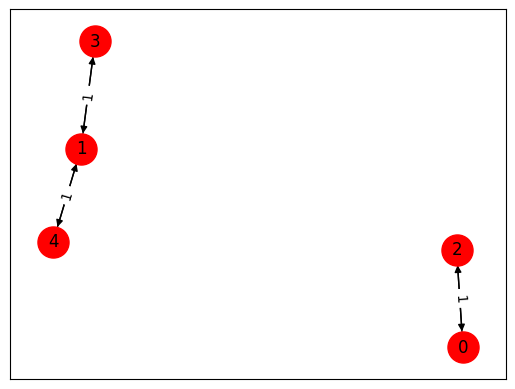

In [ ]:
# демонстрация корректности работы функции на простом примере № 1
# 5 вершин, разреженность = 0.3
gb.viz.draw(random_graph(5, 0.3))

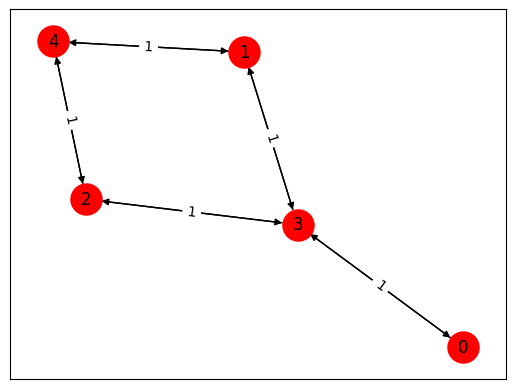

In [ ]:
# демонстрация корректности работы функции на простом примере № 1
# 5 вершин, разреженность = 0.5
gb.viz.draw(random_graph(5, 0.5))

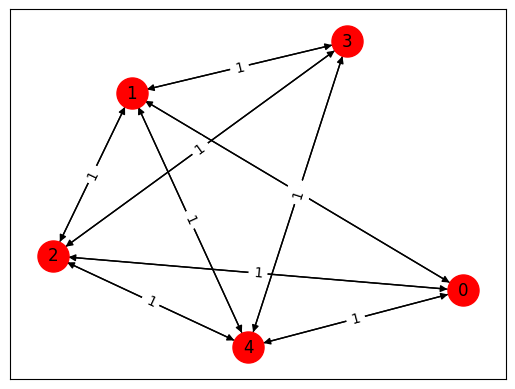

In [ ]:
# демонстрация корректности работы функции на простом примере № 1
# 5 вершин, разреженность = 0.9
gb.viz.draw(random_graph(5, 0.9))

### Тестирование и замеры времени с разными параметрами:

In [ ]:
work_time(random_graph(500, 0.05))

Naive
17.7 ms ± 7.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive_with_mask
2.04 ms ± 836 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Cohen
1.21 ms ± 228 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Sandia
795 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
work_time(random_graph(500, 0.1))

Naive
55.2 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive_with_mask
6.19 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Cohen
3.1 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sandia
2.44 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
work_time(random_graph(500, 0.3))

Naive
62.6 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Naive_with_mask
78.8 ms ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Cohen
23.1 ms ± 882 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Sandia
18.5 ms ± 8.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
work_time(random_graph(1000, 0.05))

Naive
196 ms ± 23.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Naive_with_mask
10.1 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Cohen
The slowest run took 5.48 times longer than the fastest. This could mean that an intermediate result is being cached.
7.55 ms ± 6.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sandia
2.74 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
work_time(random_graph(1000, 0.1))

Naive
180 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Naive_with_mask
41.4 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Cohen
19.8 ms ± 7.35 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Sandia
12.2 ms ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
work_time(random_graph(1000, 0.3))

Naive
469 ms ± 4.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Naive_with_mask
614 ms ± 172 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Cohen
265 ms ± 91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Sandia
84.4 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Общие выводы: <br>
1. Функция работает довольно медленно. При паметрах 1000 вершин и показателе разреженности 0.3, что составляет порядка 166 тысяч рёбер, в колабе функция работает порядка 20 минут.
2. Ввиду пункта 1. дальнейшее увеличение количества вершин или значения показателя разреженности для тестирования функции не представляется возможным.
3. На случайно сгенерированных графах повторяется ситуация с временем работы фунций подсчёта треугольников, описанная ранее. Так наивный алгоритм работает медленнее всех, алгоритм Сандии - быстрее всех.<br>
4. При одинаковом количестве вершин увеличение количества рёбер ведёт к быстрому (быстрее чем линейному) увеличению времени работы функций подсчёта треугольников.